In [13]:
import numpy as np
from scipy import stats
from math import sqrt, log
import matplotlib.pyplot as plt

### 1.1.1 Predicting financial market movements

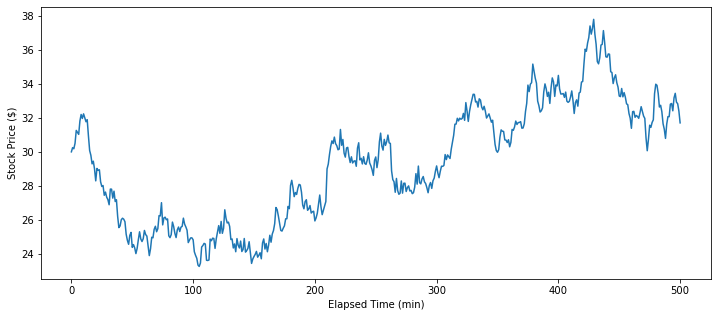

In [16]:
ys = [30]
xs = range(0,501)
np.random.seed(seed=42)
for delta in np.random.normal(0,0.5,500):
    ys.append(ys[-1] + delta)
    
fig_dim = (12, 5)
plt.subplots(figsize=fig_dim)
plt.ylabel('Stock Price ($)')
plt.xlabel('Elapsed Time (min)')
plt.plot(ys)
plt.show()

In [23]:
r = stats.linregress(xs,ys)
line =  [r.slope * x + r.intercept for x in xs] # 基准线
std = np.std([(y-y0) for y,y0 in zip(ys,line)])

In [24]:
top = [y + std for y in line]
bottom = [y - std for y in line]

Text(0.5, 0, 'Elapsed Time (min)')

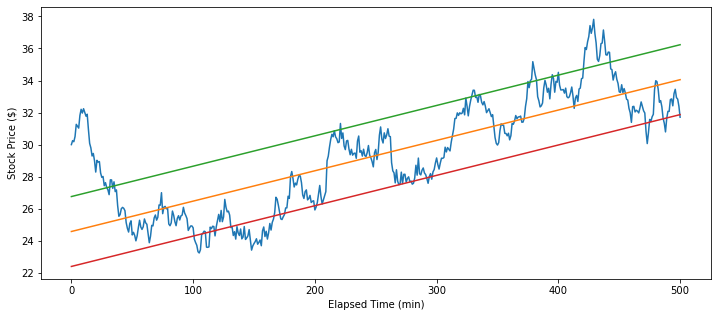

In [25]:
fig_dim = (12, 5)
plt.subplots(figsize=fig_dim)
plt.plot(xs,ys)
plt.plot(xs,line)
plt.plot(xs,top)
plt.plot(xs,bottom)
plt.ylabel('Stock Price ($)')
plt.xlabel('Elapsed Time (min)')

### 1.1.2 Finding a good deal

In [27]:
mill_ = [4.1429, 8.9173, 6.5, 6.0601, 12.3, 6.2, 2.5782, 0.9, 1.7, 13.1045, 24.7, 9.2699, 17.2, 10.0, 10.0, 2.8, 12.3773, 19.6, 7.3397, 2.1178, 12.9886, 10.9884, 16.9, 6.0, 12.9, 8.1936, 10.5, 8.0713, 1.7, 10.0, 15.6097, 17.0, 16.7, 5.6, 11.3, 19.9, 9.6, 21.6, 20.3]
price_ = [16980.0, 15973.0, 9900.0, 15998.0, 3900.0, 12540.0, 21688.0, 17086.0, 23000.0, 8900.0, 3875.0, 10500.0, 3500.0, 26992.0, 17249.0, 19627.0, 9450.0, 3000.0, 14999.0, 24990.0, 7967.0, 7257.0, 4799.0, 13982.0, 5299.0, 14310.0, 7800.0, 12250.0, 23000.0, 14686.0, 7495.0, 4950.0, 3500.0, 11999.0, 9600.0, 1999.0, 4300.0, 3500.0, 4200.0]

In [37]:
def PriceSell(mill_in):
    price_sell = 26500 * (0.905 ** mill_in)
    return price_sell

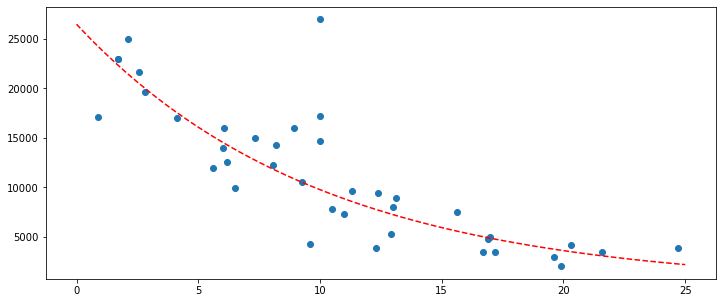

In [38]:
x_i = np.linspace(0, 25, 100)
y_i = [PriceSell(x) for x in x_i]

fig_dim = (12, 5)
plt.subplots(figsize=fig_dim)
plt.plot(x_i, y_i, 'r--')
plt.scatter(mill_, price_)
plt.show()

(749.3499999999999, 28241.65)

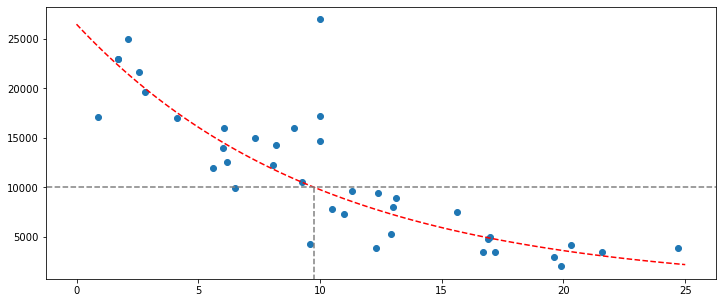

In [51]:
# 求逆以后得到价格对应的期望里程

target_mill = log(10000/26500)/log(0.905)

fig_dim = (12, 5)
plt.subplots(figsize=fig_dim)
plt.plot(x_i, y_i, 'r--')
plt.scatter(mill_, price_)

xlim,ylim = plt.xlim(), plt.ylim()  # add xlim give the plot a value lim

plt.plot([-5,30],[10000,10000],color="gray",linestyle="dashed") # target prices line
# tagrget prices match the target milage
plt.plot([target_mill,target_mill],[-5000,10000],color="gray",linestyle="dashed")
plt.xlim(*xlim)
plt.ylim(*ylim)